In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

In [3]:
raw_data = pd.read_csv("data/Dummies.csv")
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [4]:
data = raw_data.copy()
data["Attendance"] = data['Attendance'].map({'Yes': 1, 'No': 0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [5]:
x1 = data.drop("GPA",axis=1)
y = data["GPA"]

In [6]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.19e-15
Time:                        22:08:51   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
results.params

const         0.643850
SAT           0.001400
Attendance    0.222644
dtype: float64

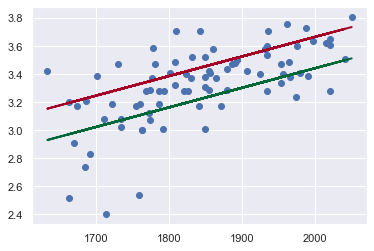

In [9]:
plt.scatter(data["SAT"],y)
y_hat_no = 0.0014*x1["SAT"]+0.643
y_hat_yes = 0.0014*x1["SAT"]+0.8665
fig = plt.plot(data['SAT'],y_hat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],y_hat_yes, lw=2, c='#a50026')

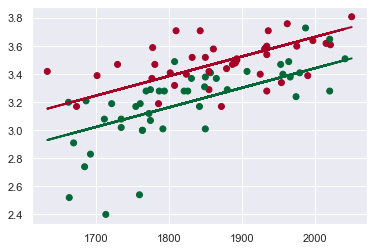

In [10]:
plt.scatter(data['SAT'],y, c=data['Attendance'],cmap='RdYlGn_r')
y_hat_no = 0.0014*x1["SAT"]+0.643
y_hat_yes = 0.0014*x1["SAT"]+0.8665
fig = plt.plot(data['SAT'],y_hat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],y_hat_yes, lw=2, c='#a50026')

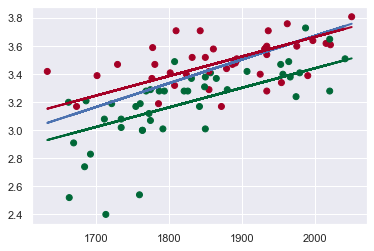

In [12]:
plt.scatter(data['SAT'],y, c=data['Attendance'],cmap='RdYlGn_r')
y_hat = 0.0017*data['SAT'] + 0.275
y_hat_no = 0.0014*x1["SAT"]+0.643
y_hat_yes = 0.0014*x1["SAT"]+0.8665
fig = plt.plot(data['SAT'],y_hat,lw=2,c="#4C72B0")
fig = plt.plot(data['SAT'],y_hat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],y_hat_yes, lw=2, c='#a50026')